In [ ]:
# Install any necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the training and testing datasets
train_data = pd.read_csv('/content/obesity_train.csv') #change dataset path accordingly
test_data = pd.read_csv('/content/obesity_test.csv')  #change dataset path accordingly

# Explore the train data
print(train_data.head())
print(train_data.info())


   id   age alcohol_freq caloric_freq devices_perday eat_between_meals  \
0   1  21.0        Never           no        up to 5         Sometimes   
1   2  23.0   Frequently           no        up to 5         Sometimes   
2   3   NaN   Frequently           no        up to 2         Sometimes   
3   4  22.0    Sometimes           no        up to 2         Sometimes   
4   5  22.0    Sometimes           no        up to 2         Sometimes   

   gender  height  marrital_status  meals_perday  ... parent_overweight  \
0  Female    1.62              NaN           3.0  ...               yes   
1    Male    1.80              NaN           3.0  ...               yes   
2    Male    1.80              NaN           3.0  ...                no   
3    Male    1.78              NaN           1.0  ...                no   
4    Male    1.64              NaN           3.0  ...                no   

  physical_activity_perweek region siblings  smoke transportation  \
0                       NaN  LatAm 

In [ ]:
# Explore the test data
print(test_data.head())
print(test_data.info())

     id   age alcohol_freq caloric_freq devices_perday eat_between_meals  \
0  1612  21.0    Sometimes           no        up to 2         Sometimes   
1  1613  29.0    Sometimes          yes        up to 2         Sometimes   
2  1614  23.0    Sometimes          NaN        up to 2         Sometimes   
3  1615  22.0        Never          yes        up to 5         Sometimes   
4  1616  26.0    Sometimes          yes    more than 5        Frequently   

   gender  height  marrital_status  meals_perday monitor_calories  \
0  Female    1.52              NaN           3.0              yes   
1    Male    1.62              NaN           3.0               no   
2  Female    1.50              NaN           3.0               no   
3    Male    1.72              NaN           3.0               no   
4    Male    1.85              NaN           3.0               no   

  parent_overweight physical_activity_perweek region  siblings smoke  \
0               yes                 5 or more  LatAm    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check for missing values in both datasets
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())





Missing Values in Training Data:
id                              0
age                            66
alcohol_freq                   36
caloric_freq                   20
devices_perday                 22
eat_between_meals              59
gender                         20
height                         14
marrital_status              1611
meals_perday                    9
monitor_calories               39
parent_overweight              20
physical_activity_perweek     565
region                         67
siblings                       12
smoke                          12
transportation                 40
veggies_freq                   26
water_daily                    34
weight                         53
obese_level                     0
dtype: int64

Missing Values in Testing Data:
id                             0
age                           25
alcohol_freq                  10
caloric_freq                   9
devices_perday                 6
eat_between_meals             15
gender   

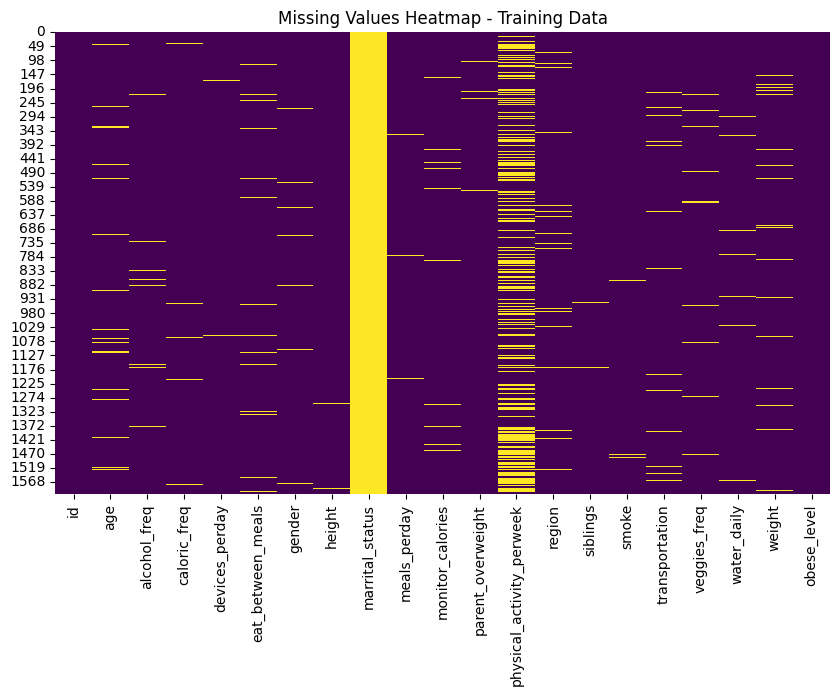

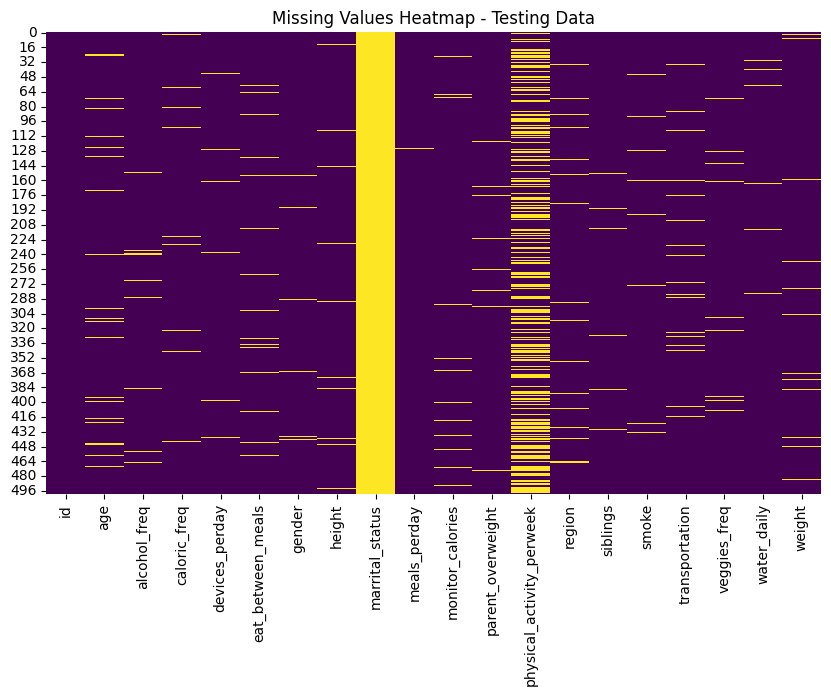

In [ ]:
# Visualize missing values (if any) using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap - Training Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap - Testing Data")
plt.show()



In [ ]:
# Fill missing values with median for numerical columns
# and mode for categorical columns
for column in train_data.columns:
    if train_data[column].dtype in ['float64', 'int64']:
        train_data[column].fillna(train_data[column].median(), inplace=True)
    else:
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)

for column in test_data.columns:
    if test_data[column].dtype in ['float64', 'int64']:
        test_data[column].fillna(test_data[column].median(), inplace=True)
    else:
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)

# Confirm missing values have been handled
print("\nMissing Values After Handling - Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values After Handling - Testing Data:")
print(test_data.isnull().sum())




Missing Values After Handling - Training Data:
id                              0
age                             0
alcohol_freq                    0
caloric_freq                    0
devices_perday                  0
eat_between_meals               0
gender                          0
height                          0
marrital_status              1611
meals_perday                    0
monitor_calories                0
parent_overweight               0
physical_activity_perweek       0
region                          0
siblings                        0
smoke                           0
transportation                  0
veggies_freq                    0
water_daily                     0
weight                          0
obese_level                     0
dtype: int64

Missing Values After Handling - Testing Data:
id                             0
age                            0
alcohol_freq                   0
caloric_freq                   0
devices_perday                 0
eat_between_m

<ipython-input-119-ccf3a2599ce1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].median(), inplace=True)
<ipython-input-119-ccf3a2599ce1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# Drop the 'marrital_status' column from both datasets
train_data.drop(columns=['marrital_status'], inplace=True)
test_data.drop(columns=['marrital_status'], inplace=True)

# Verify the column has been removed
print("Columns in Training Data after dropping 'marrital_status':")
print(train_data.columns)

print("\nColumns in Testing Data after dropping 'marrital_status':")
print(test_data.columns)


Columns in Training Data after dropping 'marrital_status':
Index(['id', 'age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'region', 'siblings', 'smoke', 'transportation', 'veggies_freq',
       'water_daily', 'weight', 'obese_level'],
      dtype='object')

Columns in Testing Data after dropping 'marrital_status':
Index(['id', 'age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'region', 'siblings', 'smoke', 'transportation', 'veggies_freq',
       'water_daily', 'weight'],
      dtype='object')


In [ ]:
#encoding categorial variables - label encoding
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns, excluding the target variable 'obese_level'
categorical_columns = train_data.select_dtypes(include=['object']).columns.drop('obese_level', errors='ignore')
print("Categorical Columns (excluding target):", categorical_columns)

# Dictionary to store label encoders for each column
label_encoders = {}

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()  # Initialize LabelEncoder
    train_data[col] = le.fit_transform(train_data[col].astype(str))  # Fit and transform training data
    test_data[col] = le.transform(test_data[col].astype(str))  # Transform test data using the same encoder
    label_encoders[col] = le  # Store the encoder for future use

# Verify encoded columns in the training data
print("\nEncoded Training Data Head:")
print(train_data.head())

# Save encoded data for inspection
train_data.to_csv('encoded_train_data.csv', index=False)
test_data.to_csv('encoded_test_data.csv', index=False)


Categorical Columns (excluding target): Index(['alcohol_freq', 'caloric_freq', 'devices_perday', 'eat_between_meals',
       'gender', 'monitor_calories', 'parent_overweight',
       'physical_activity_perweek', 'region', 'smoke', 'transportation',
       'veggies_freq', 'water_daily'],
      dtype='object')

Encoded Training Data Head:
   id   age  alcohol_freq  caloric_freq  devices_perday  eat_between_meals  \
0   1  21.0             2             0               2                  3   
1   2  23.0             1             0               2                  3   
2   3  23.0             1             0               1                  3   
3   4  22.0             3             0               1                  3   
4   5  22.0             3             0               1                  3   

   gender  height  meals_perday  monitor_calories  parent_overweight  \
0       0    1.62           3.0                 0                  1   
1       1    1.80           3.0                 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('obese_level', errors='ignore')  # Exclude the target variable
print("Numerical Columns for Scaling:", numerical_columns)

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Verify scaled data
print("\nScaled Training Data Head:")
print(train_data[numerical_columns].head())

# Save scaled datasets for further use
train_data.to_csv('scaled_train_data.csv', index=False)
test_data.to_csv('scaled_test_data.csv', index=False)


Numerical Columns for Scaling: Index(['id', 'age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'region', 'siblings', 'smoke', 'transportation', 'veggies_freq',
       'water_daily', 'weight'],
      dtype='object')

Scaled Training Data Head:
         id       age  alcohol_freq  caloric_freq  devices_perday  \
0 -1.730976 -0.518579     -1.186865     -2.726638        1.022131   
1 -1.728826 -0.203322     -3.025365     -2.726638        1.022131   
2 -1.726675 -0.203322     -3.025365     -2.726638       -0.474826   
3 -1.724525 -0.360950      0.651635     -2.726638       -0.474826   
4 -1.722375 -0.360950      0.651635     -2.726638       -0.474826   

   eat_between_meals    gender    height  meals_perday  monitor_calories  \
0           0.406016 -1.051609 -0.883832      0.385207         -0.214718   
1           0.406016  0.950923  1.00

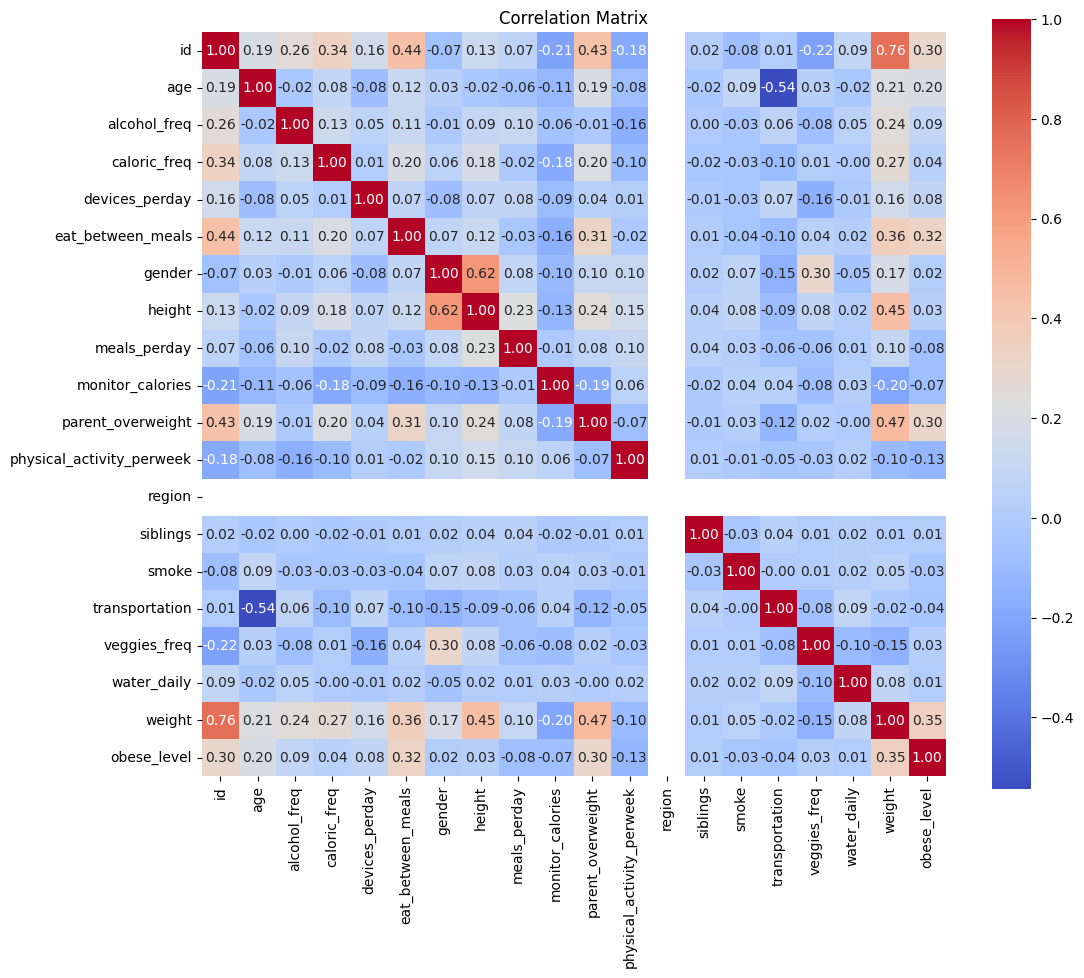

Top Selected Features based on Correlation: Index(['obese_level', 'weight', 'eat_between_meals', 'parent_overweight', 'id',
       'age', 'physical_activity_perweek', 'alcohol_freq', 'devices_perday',
       'meals_perday'],
      dtype='object')

Sample Data with Selected Features:
   obese_level    weight  eat_between_meals  parent_overweight        id  \
0            1 -0.890210           0.406016           0.460640 -1.730976   
1            1 -0.383217           0.406016           0.460640 -1.728826   
2            5  0.006778           0.406016          -2.170891 -1.726675   
3            6  0.123777           0.406016          -2.170891 -1.724525   
4            1 -1.319204           0.406016          -2.170891 -1.722375   

        age  physical_activity_perweek  alcohol_freq  devices_perday  \
0 -0.518579                  -0.580219     -1.186865        1.022131   
1 -0.203322                   1.144380     -3.025365        1.022131   
2 -0.203322                   1.144380     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Ensure 'obese_level' is numeric
if train_data['obese_level'].dtype == 'object':
    le = LabelEncoder()
    train_data['obese_level'] = le.fit_transform(train_data['obese_level'])

# Compute correlation matrix (numerical columns only)
corr_matrix = train_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

# Identify top features correlated with the target
# Absolute correlation values to get magnitude
target_correlation = corr_matrix['obese_level'].abs()

# Sort features by their correlation with 'obese_level'
important_features = target_correlation.sort_values(ascending=False).index[:10]
print(f"Top Selected Features based on Correlation: {important_features}")

# Create a new dataset with selected features
selected_features_data = train_data[important_features]
print("\nSample Data with Selected Features:")
print(selected_features_data.head())

# Save the selected features for further steps
selected_features_data.to_csv('selected_features_train_data.csv', index=False)


In [ ]:
#train-test split

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = train_data[important_features].drop(columns=['obese_level'])  # Features
y = train_data['obese_level']  # Target variable

# Perform the train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the split
print(f"Training Features Shape: {X_train.shape}")
print(f"Validation Features Shape: {X_val.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Validation Labels Shape: {y_val.shape}")

# Save the split data for inspection
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)


Training Features Shape: (1288, 9)
Validation Features Shape: (323, 9)
Training Labels Shape: (1288,)
Validation Labels Shape: (323,)


In [ ]:
#model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30],             # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Evaluate based on accuracy
    verbose=2,
    n_jobs=-1  # Use all processors for parallel processing
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model and parameters
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Save the best model for future use
import joblib
joblib.dump(best_model, 'random_forest_best_model.pkl')

# Optional: Print the model summary
print("\nBest Model Summary:")
print(best_model)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Best Model Summary:
RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)


In [ ]:
#model evaluation

Validation Accuracy: 0.91

Confusion Matrix:
 [[36  1  0  0  0  2  0]
 [ 2 38  0  0  0  4  1]
 [ 0  1 50  0  0  1  2]
 [ 0  0  2 45  0  0  0]
 [ 0  0  1  0 46  1  0]
 [ 0  3  0  0  0 42  0]
 [ 0  5  0  0  0  2 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.79      0.84      0.82        45
           2       0.94      0.93      0.93        54
           3       1.00      0.96      0.98        47
           4       1.00      0.96      0.98        48
           5       0.81      0.93      0.87        45
           6       0.93      0.84      0.88        45

    accuracy                           0.91       323
   macro avg       0.92      0.91      0.91       323
weighted avg       0.92      0.91      0.91       323



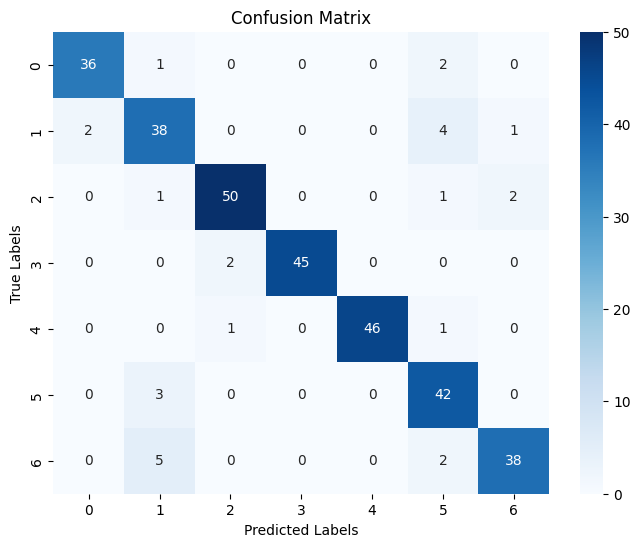

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred_val = best_model.predict(X_val)

# Evaluate performance using various metrics

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred_val)
print("\nClassification Report:\n", class_report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd

# Verify columns in the test_data
print("Columns in test_data:", test_data.columns)

# Ensure 'obese_level' is not in the list of features for the test data
features_for_test = [feature for feature in important_features if feature != 'obese_level']

# Prepare the test data by selecting the same important features
X_test = test_data[features_for_test]

# Add an identifier column if 'IDcode' is missing
if 'IDcode' not in test_data.columns:
    test_data['IDcode'] = range(1, len(test_data) + 1)  # Create a sequential identifier

# Use the trained model to predict obesity levels for the test set
test_predictions = best_model.predict(X_test)

# Save predictions to a DataFrame with appropriate format
submission = pd.DataFrame({
    'IDcode': test_data['IDcode'],  # Use the available or generated identifier column
    'obese_level': test_predictions
})

# Save the predictions to a CSV file for submission
submission.to_csv('submission.csv', index=False)

# Verify the saved file
print("\nSample Submission File:")
print(submission.head())


Columns in test_data: Index(['id', 'age', 'alcohol_freq', 'caloric_freq', 'devices_perday',
       'eat_between_meals', 'gender', 'height', 'meals_perday',
       'monitor_calories', 'parent_overweight', 'physical_activity_perweek',
       'region', 'siblings', 'smoke', 'transportation', 'veggies_freq',
       'water_daily', 'weight'],
      dtype='object')

Sample Submission File:
   IDcode  obese_level
0       1            4
1       2            4
2       3            4
3       4            4
4       5            4


In [ ]:
# critical insights

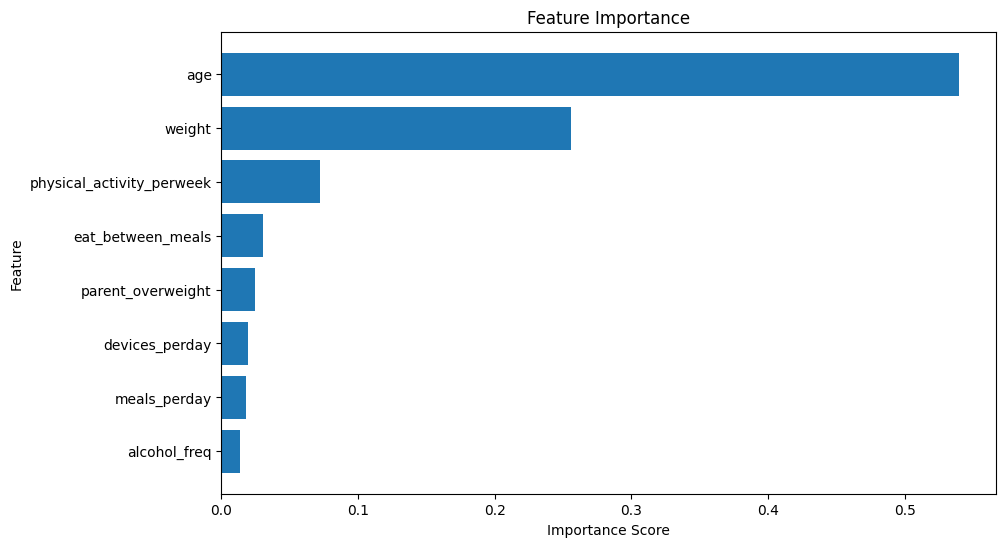

In [ ]:
#analysis of feature inportance
# Extract feature importances from the Random Forest model
importances = best_model.feature_importances_
features = X_train.columns

# Remove 'IDcode' or any unwanted column from the features
filtered_features = [feature for feature in features if feature != 'id' ]

# Create a DataFrame for feature importances, excluding 'IDcode'
feature_importance_df = pd.DataFrame({
    'Feature': filtered_features,
    'Importance': importances[:len(filtered_features)]
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



Correlation with Obesity Level:
 obese_level                  1.000000
weight                       0.352256
eat_between_meals            0.322949
parent_overweight            0.303176
age                          0.202388
alcohol_freq                 0.088949
devices_perday               0.079594
caloric_freq                 0.039060
height                       0.032423
veggies_freq                 0.026611
gender                       0.015579
siblings                     0.012631
water_daily                  0.008127
smoke                       -0.028399
transportation              -0.039717
monitor_calories            -0.074312
meals_perday                -0.077413
physical_activity_perweek   -0.125710
region                            NaN
Name: obese_level, dtype: float64


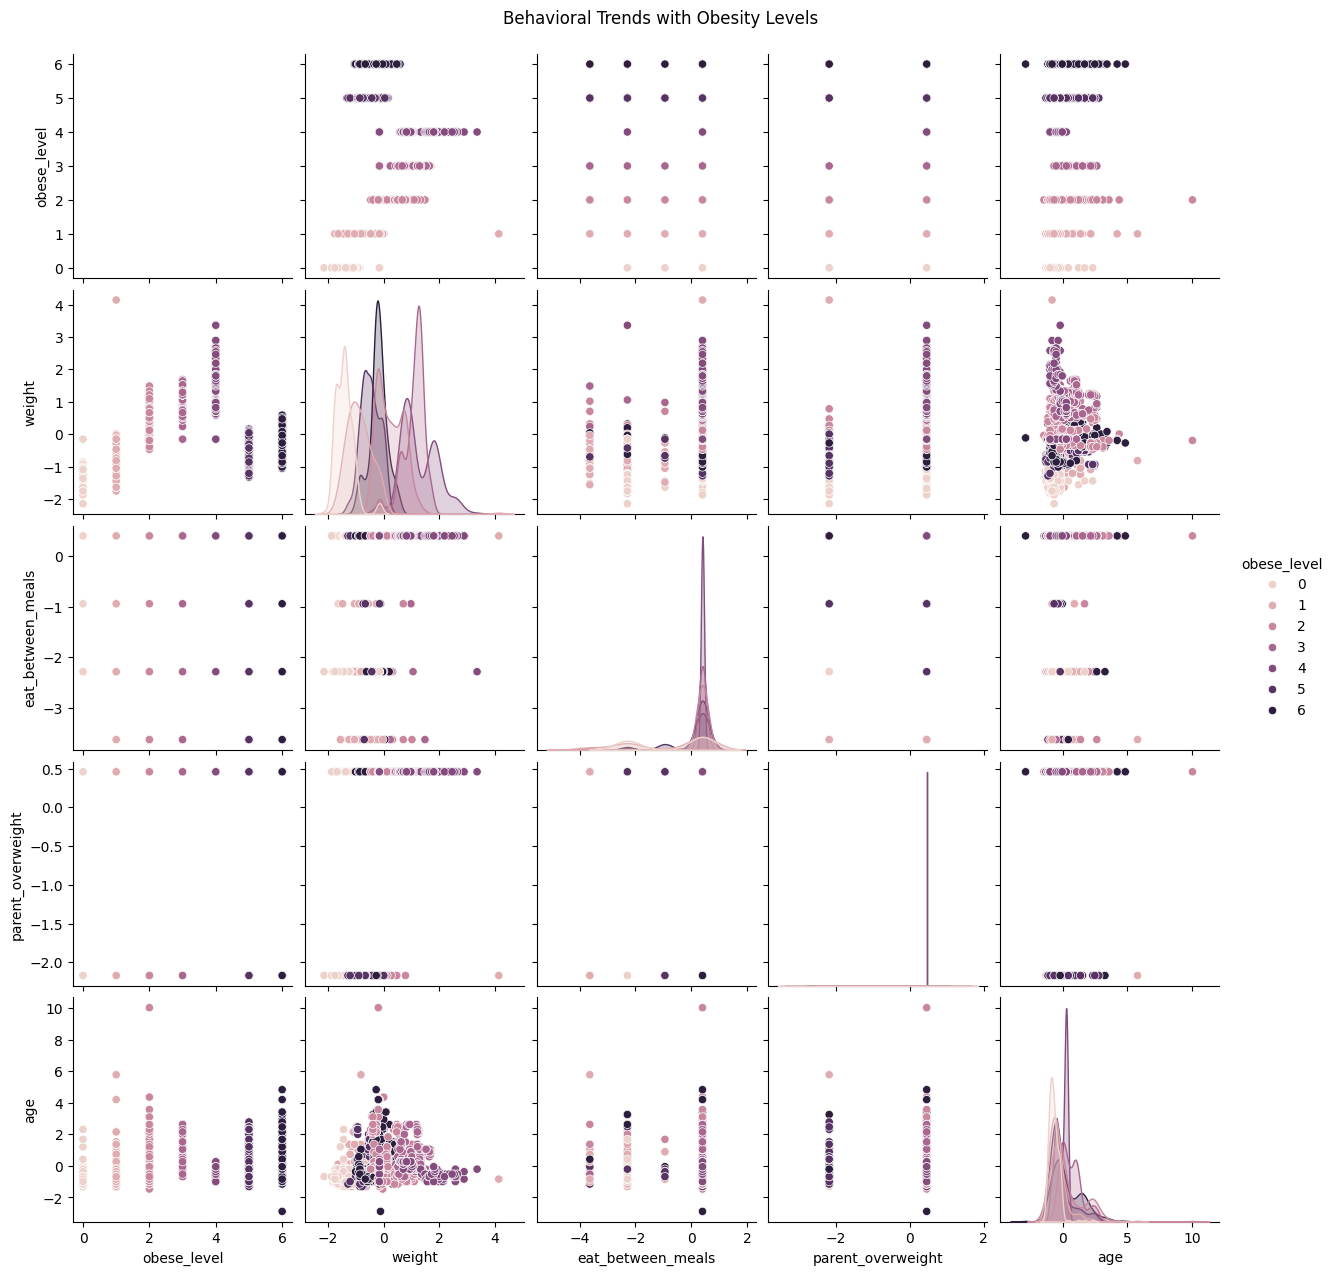

In [ ]:
# Correlation and Behavioral Trends
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the 'IDcode' column before computing the correlation
data_for_corr = train_data.drop(columns=['id'], errors='ignore')

# Analyze correlations with the target variable
corr_with_target = data_for_corr.corr()['obese_level'].sort_values(ascending=False)
print("Correlation with Obesity Level:\n", corr_with_target)

# Focus on the top correlated features for deeper analysis
important_factors = corr_with_target.head(5).index.tolist()

# Plot pairplot for the top correlated features
sns.pairplot(data_for_corr, vars=important_factors, hue="obese_level", diag_kind="kde")
plt.suptitle("Behavioral Trends with Obesity Levels", y=1.02)
plt.show()



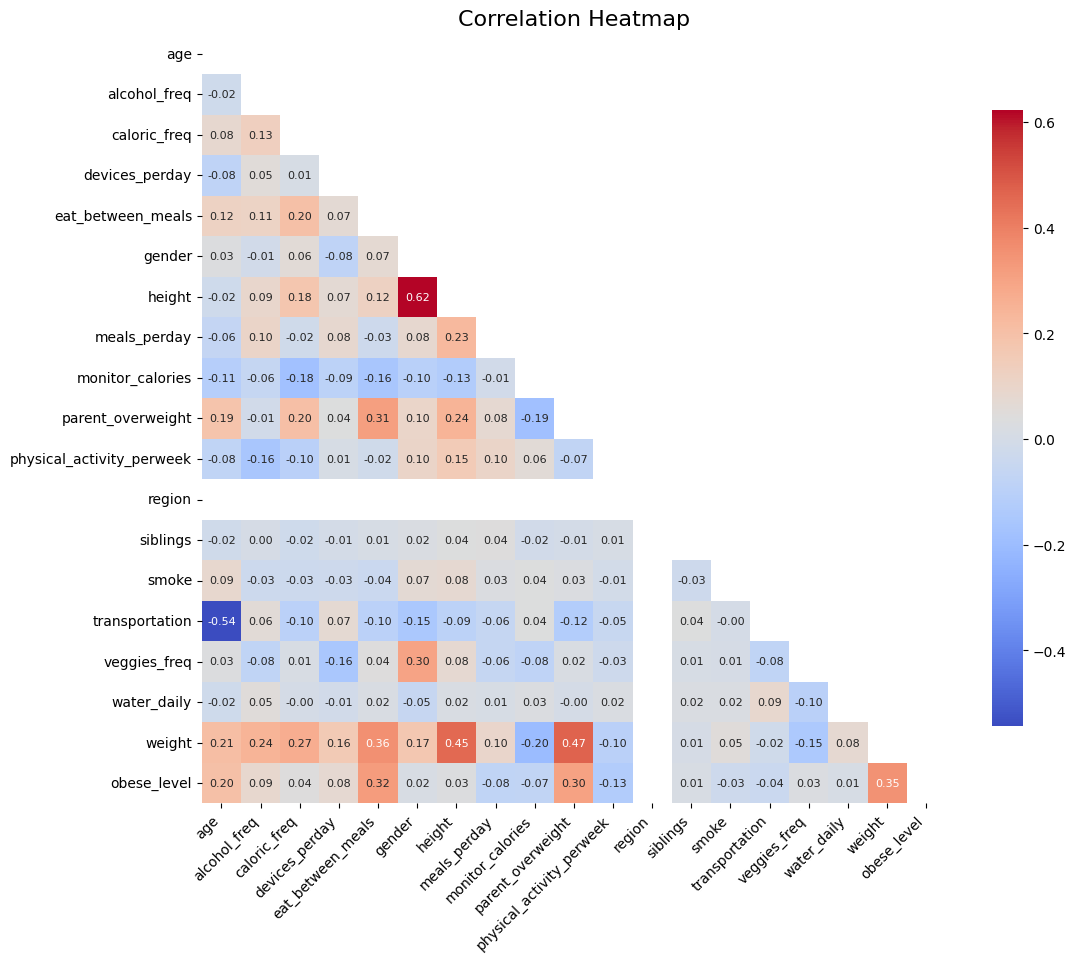

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_for_corr = train_data.drop(columns=['id'], errors='ignore')
# Compute the correlation matrix
corr_matrix = data_for_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
    cbar_kws={'shrink': .8}, annot_kws={"size": 8}
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()
